In [1]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [12.0, 7.0]
mpl.rcParams['font.size'] = 14

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

import lvm_read

# Linearni, časovno invariatni (LTI) sistemi 2 - prenosne funkcije

**Frekvenčna prenosna funkcija** $\alpha(\omega)$ predstavlja razmerje med (kompleksnimi) amplitudami harmonskega odziva in vzbujana opazovanega sistema:

$$
	\alpha(\omega) = \frac{X(\omega)}{F(\omega)}
$$


**Impulzna prenosna funkcija** $h(t)$ podaja odziv sistema na impulzno motnjo. 

Odziv na poljubno vzbujanje (signal $f(t)$) določa naslednja zveza:

$$
	x(t) = f(t) * h(t)= h(t)*f(t),
$$

kjer $*$ označuje konvolucijo.



:::{note}

Impulzna prenosna funkcija in frekvenčna prenosna funkcija sta **Fourierov par**:

$$
	h(t)=\mathcal{F}^{-1}\{\alpha(\omega)\}\qquad\textrm{ali}\qquad%
	\alpha(\omega)=\mathcal{F}\{h(t)\}.
$$

:::



## Opis LTI sistemov

Odzivni model LTI sistema opišemo z njegovo prenosno funkcijo.

Poglejmo primer enostavnega linearnega oscilatorja, ki ga opisuje gibalna enačba:

$$m \, \ddot{x} + c \, \dot{x} + k \, x = f(t)$$


![lin-oscilator](./images/06/lin_oscilator.png)

### Frekvenčna domena

Frekvenčna prenosna funkcija dušenega linearnega oscilatorja je podana z:

$$\alpha(\omega) = X(\omega) / F(\omega) = \frac{1}{-\omega^2 \, m + \mathrm{i} \, \omega \, c + k}$$

:::{admonition} Laplace-ova domena
:class: note 

Fourierova transformacija je posebna oblika [Laplace-ove transfomacije](https://en.wikipedia.org/wiki/Laplace_transform#Fourier_transform), ki jo pogosto uporabimo za pretvorbo diferencialnih enačb v algebrajske enačbe. 

Velja naslednja zveza med frekvenčno ($\omega$) in Laplace-ovo ($s$) domeno:

$s = \mathrm{i} \, \omega$

Zgornjo prenosno funkcijo linearnega oscilatorja v $s$-domeni tako zapišemo: 

$$H(s) = \frac{1}{m \, s^2 + c \, s + k}$$
:::

Poglejmo konkreten primer:

In [3]:
m = 2
k = 50
c = 2.5

freq = np.linspace(0, 10, 101)
w = 2*np.pi*freq

In [4]:
def H_f(freq, m, k, c):
    """
    Frekvenčna prenosna funkcija linearnega oscilatorja.
    """
    omega = 2*np.pi*freq
    return 1 / (-omega**2*m + 1j*omega*c + k)


In [5]:
def H_s(freq, m, k, c):
    """
    Prenosna funkcija linearnega oscilatorja v s-domeni.
    """
    omega = 2*np.pi*freq
    s = 1j*omega
    return 1 / (m*s**2 + c*s + k)

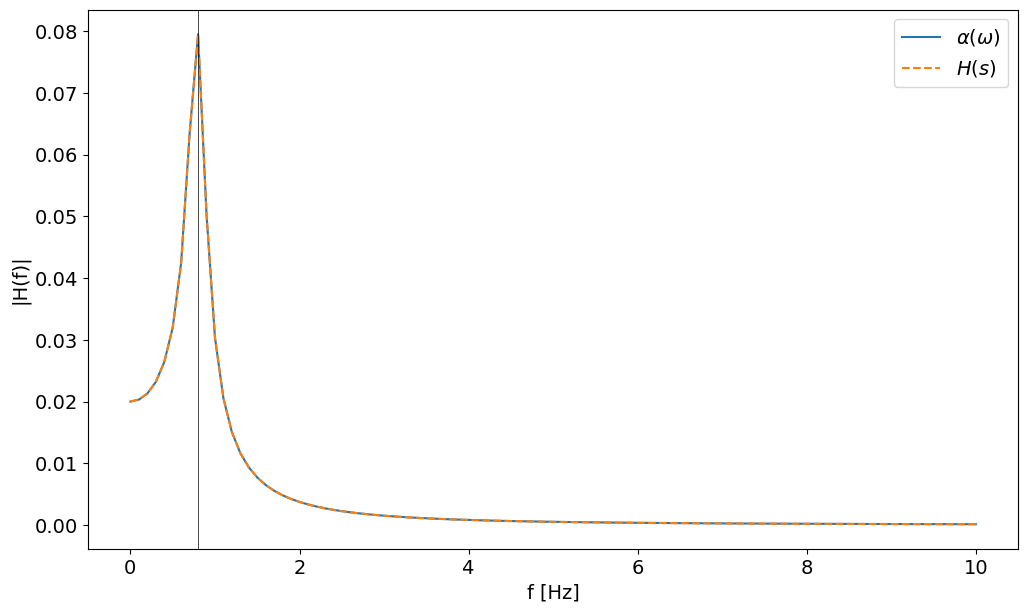

In [6]:
plt.plot(freq, np.abs(H_f(freq, m, k, c)), label=r'$\alpha({\omega})$')
plt.plot(freq, np.abs(H_s(freq, m, k, c)), '--', label='$H(s)$')
plt.axvline(x=np.sqrt(k/m) / (2*np.pi), c='k', lw=0.5)
plt.legend()
plt.xlabel('f [Hz]')
plt.ylabel('|H(f)|');

:::{admonition} Naloga 1 (10 minut): uporaba `scipy.signal.lti`
:class: important

Sistem linearnga oscilatorja definirajte z uporabo `scipy.signal.lti`. Pomagajte si z [dokumentacijo](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lti.html#scipy.signal.lti).

Pri tem uporabite prenosno funkcijo sistema v $s$-domeni: 

$$H(s) = \frac{1}{m \, s^2 + c \, s + k}$$

Primerjajte frekvenčno in impulzno prenosno funkcijo, pripravljeni na podlagi zgornje enačbe, s tistima, ki ju dobite z `lti.freqresp` ter `lti.impulse`.

:::

In [7]:
T = 1 / (freq[1] - freq[0])
dt =  1/ (2*freq[-1])
t = np.arange(0, T+dt, dt)

Spomnimo se, frekvnečna prenosna funkcija $\alpha(\omega)$ in impulzna prenosna funkcija $h(t)$ sta Fourierov par:

In [8]:
h = np.fft.irfft(H_f(freq, m, k, c), n=2*(len(freq)-1)+1)

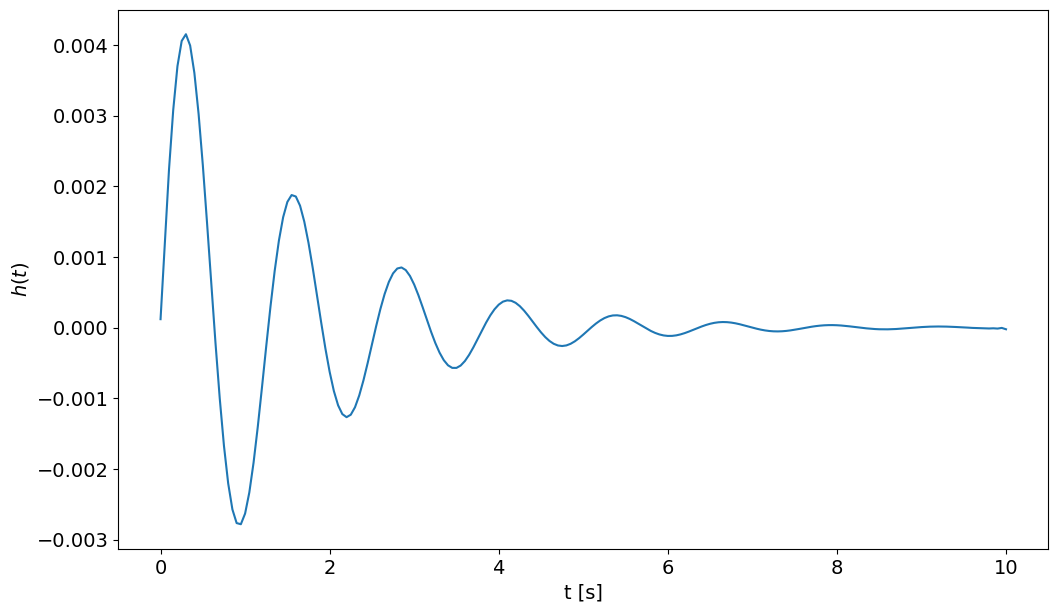

In [9]:
plt.plot(t, h)
plt.xlabel('t [s]')
plt.ylabel('$h(t)$');

In [10]:
sistem = signal.lti([1], [m, c, k])
w, H_lti = sistem.freqresp(w)
t, h_lti = sistem.impulse(T=t)

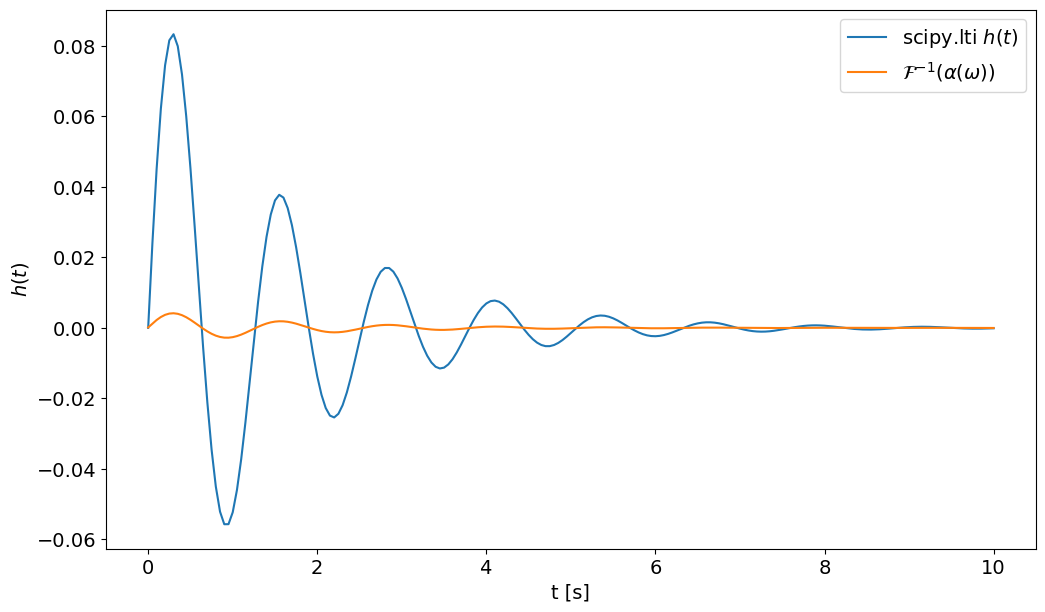

In [11]:
plt.plot(t, h_lti, label='scipy.lti $h(t)$')
plt.plot(t, h, label=r'$\mathcal{F}^{-1}(\alpha(\omega))$')
plt.legend()
plt.xlabel('t [s]')
plt.ylabel('$h(t)$');

Opazimo, da sta izračunani impulzni prenosni funkciji različno normirani.

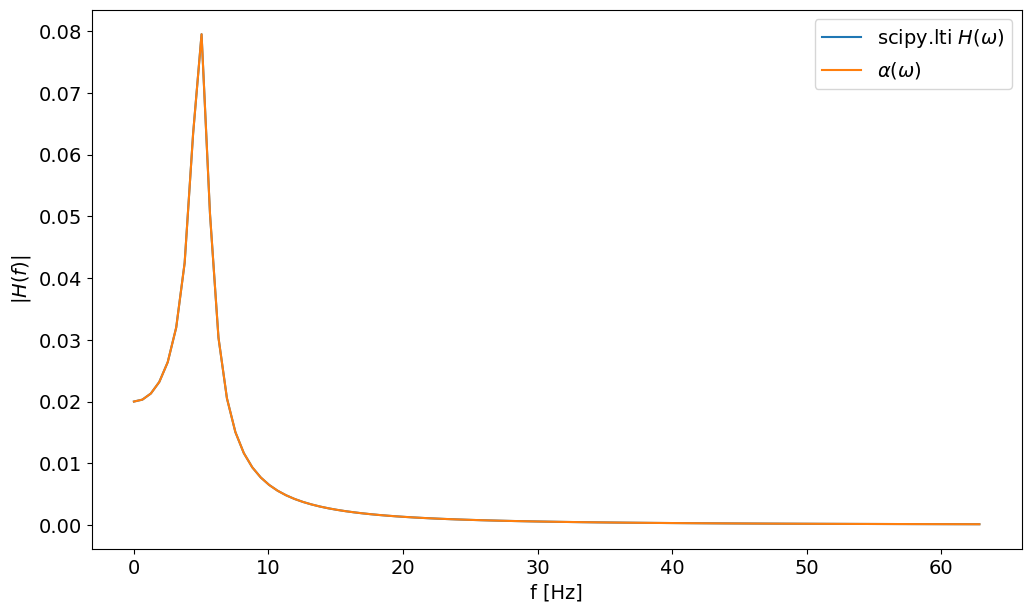

In [12]:
plt.plot(w, np.abs(H_lti), label='scipy.lti $H(\omega)$')
plt.plot(w, np.abs(H_f(freq, m, k, c)), label=r'$\alpha(\omega)$')
plt.legend()
plt.xlabel('f [Hz]')
plt.ylabel('$|H(f)|$');

:::{admonition} Naloga 2 (20 minut): lastnosti LTI sistemov
:class: important

Z uporabo zgoraj pripravljene impulzne prenosne funkcije $h(t)$ ter `lti.output` na dva načina prikažite načelo superpozicije:

$$ 
  a_1\,f_1(t)+a_2\,f_2(t)   \to   {\textrm{Linearen sistem}}  \to    a_1\,x_1(t)+a_2\,x_2(t)
$$

in lastnost časovne invariatnosti:

$$
  f(t-t_0)   \to   {\textrm{Časovno invarianten sistem}}  \to    x(t-t_0) 
$$

LTI sistema.

Uporabite spodaj pripravjena signala $f_1$, $f_2$ ter vrednosti konstant $a_1$, $a_2$.

:::

In [13]:
a_1 = 25
a_2 = -35

In [14]:
f_1 = np.zeros_like(t)
f_1[10:20] = np.sin(2*np.pi*np.arange(10)/20)

f_2 = np.zeros_like(t)
f_2[32:36] = np.sin(2*np.pi*np.arange(4)/8)

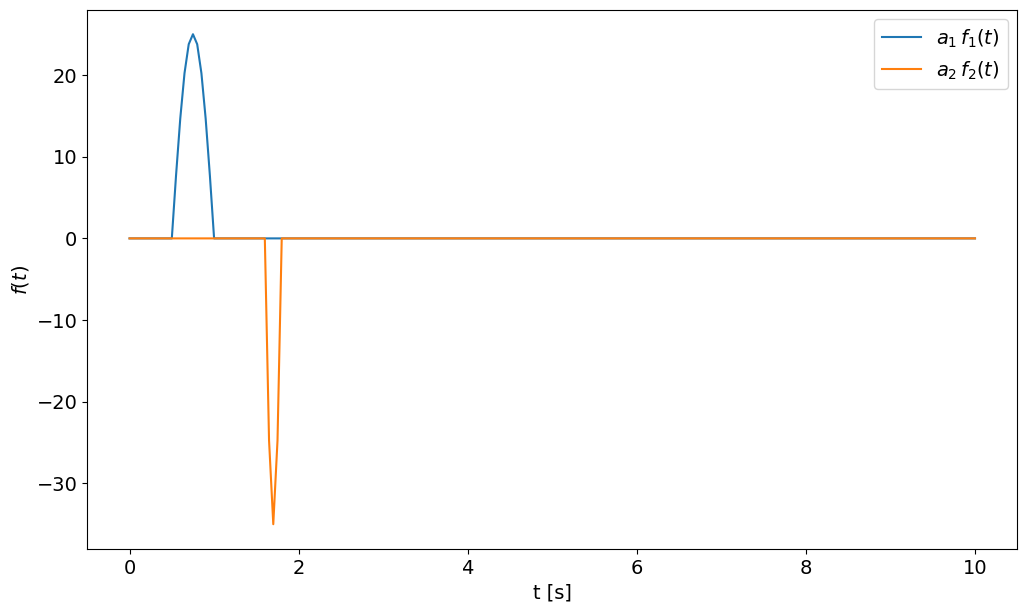

In [15]:
plt.plot(t, a_1*f_1, label='$a_1 \, f_1(t)$')
plt.plot(t, a_2*f_2, label='$a_2 \, f_2(t)$')
plt.xlabel('t [s]')
plt.ylabel('$f(t)$')
plt.legend();

In [16]:
F_1 = np.fft.rfft(a_1*f_1)
F_2 = np.fft.rfft(a_2*f_2)
resp_F_1 = H_f(freq, m, k, c) * F_1
resp_F_2 = H_f(freq, m, k, c) * F_2

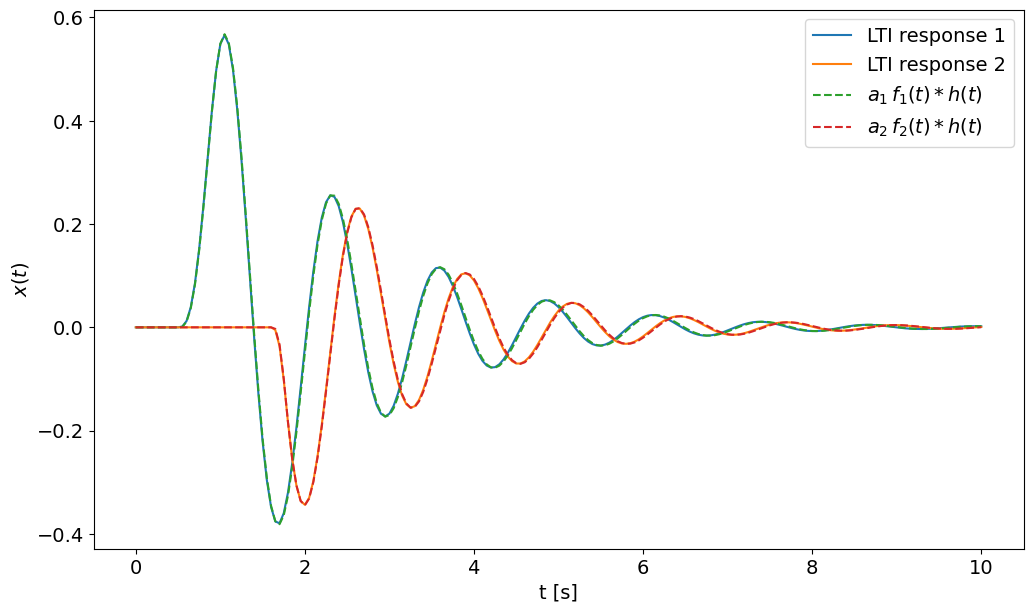

In [17]:
t, resp_1_lti, _ = sistem.output(a_1*f_1, t)
t, resp_2_lti, _ = sistem.output(a_2*f_2, t)

resp_1_f = np.fft.irfft(resp_F_1, n=2*(len(freq)-1)+1)
resp_2_f = np.fft.irfft(resp_F_2, n=2*(len(freq)-1)+1)

resp_1_conv = np.convolve(a_1*f_1, h, mode='full')[:len(t)]
resp_2_conv = np.convolve(a_2*f_2, h, mode='full')[:len(t)]

plt.plot(t, resp_1_lti, label='LTI response 1')
plt.plot(t, resp_2_lti, label='LTI response 2')

#plt.plot(t, resp_1_f, label=r'$\mathcal{F}^{-1}(F(\omega) \cdot H(\omega)$)')

plt.plot(t, resp_1_conv, '--', label='$a_1 \, f_1(t) * h(t)$')
plt.plot(t, resp_2_conv, '--', label='$a_2 \, f_2(t) * h(t)$')

plt.legend()
plt.xlabel('t [s]')
plt.ylabel('$x(t)$');

In [18]:
f_total = a_1*f_1 + a_2*f_2
response_total = np.convolve(f_total, h, mode='full')[:len(t)]
response_super = resp_1_lti + resp_2_lti

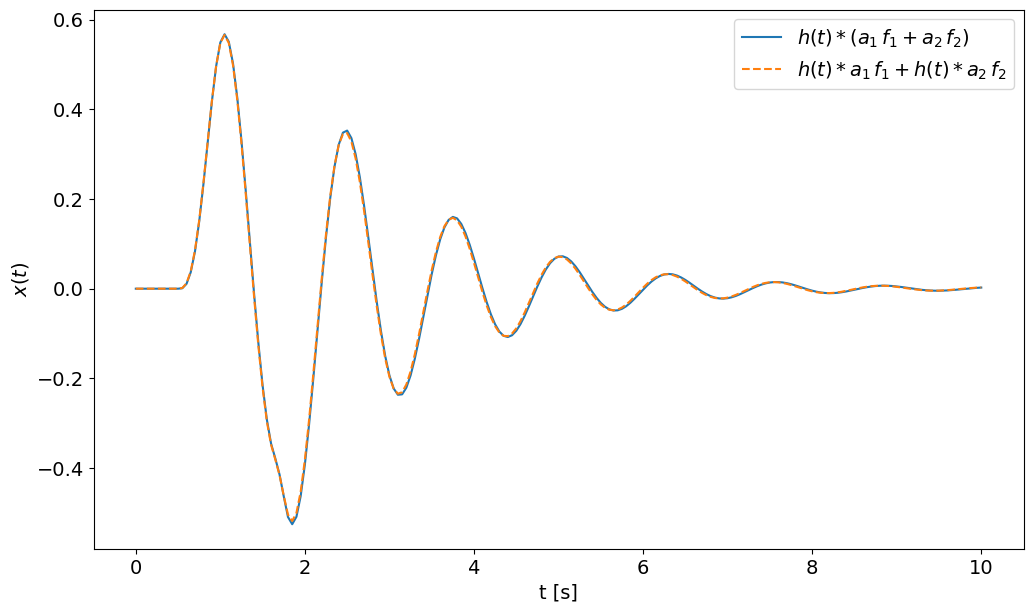

In [19]:
plt.plot(t, response_total, label='$h(t) * (a_1\,f_1 + a_2\,f_2)$')
plt.plot(t, response_super, '--', label='$h(t) * a_1\,f_1 + h(t) * a_2\,f_2$')

plt.legend()
plt.xlabel('t [s]')
plt.ylabel('$x(t)$');

## Obdelava signalov za oceno impulzne prenosne funkcije

:::{admonition} Naloga 3 (30 minut): Prenosne funkcije nosilca
:class: seealso

Na primeru nosilca, obravnavanega na prejšnji vaji, ocenimo izmerjene frekvenčne prenosne funkcije nosilca.

:::

Naložimo datoteko z meritvami:

In [20]:
meritev_pot = '10signal.lvm'
meritev = lvm_read.read(meritev_pot)

Izberimo eno od obravnavanih točk.

Za demonstracijo pomena obdelave zajetih signalov uporabimo le del zajetih časovnih vrst ($T_{\text{analiza}}$).

In [21]:
točka = 10
T_analiza = 0.5

dt = meritev[točka]['Delta_X'][0]
N = int(T_analiza * 1/dt)
print(meritev[točka]['Y_Unit_Label'])

KeyError: 10

In [22]:
f, a_g = meritev[točka]['data'][:N].T
a = a_g * 9.81
t = np.arange(len(f)) * dt

KeyError: 10

NameError: name 'a' is not defined

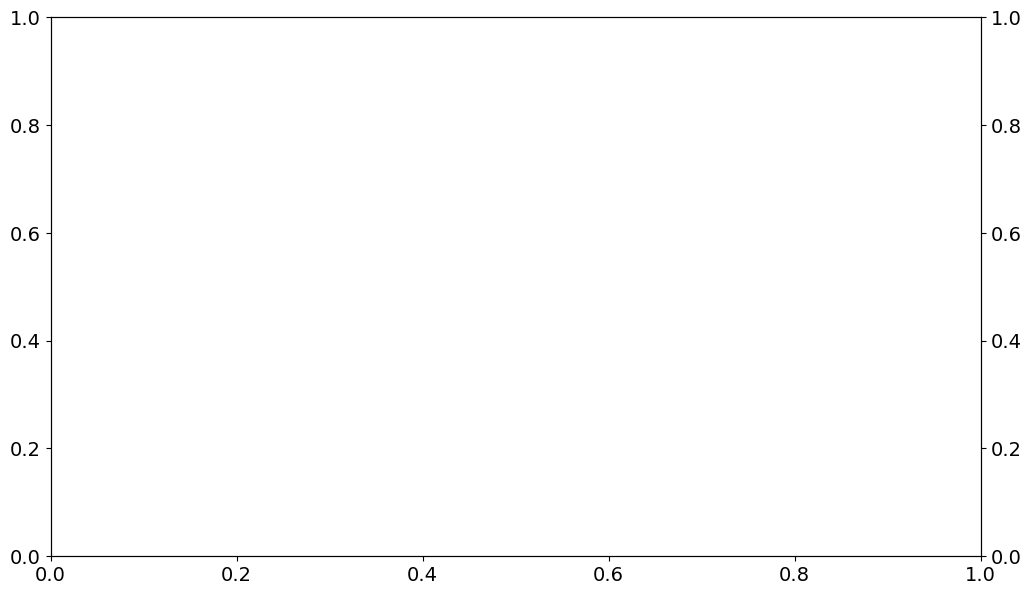

In [23]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(t, a, alpha=1, label='$a(t)$')
ax2.plot(t, f, alpha=1, c='C1', label='$f(t)$')

ax.legend(loc=1)
ax2.legend(loc=2)

ax2.set_ylabel('F [N]')
ax.set_ylabel('a [m/s$^2$]')
ax.set_xlabel('t [s]');

Opazimo, da se v opazovanem časovnem intervalu zajet odziv sistema ne izniha popolnoma.

Poglejmo amplitudna spektra zajetih signalov za izbrano točko:

In [ ]:
F = np.fft.rfft(f) / len(f)
F[1:] *= 2

A = np.fft.rfft(a) / len(a)
A[1:] *= 2

freq = np.fft.rfftfreq(len(t), dt)

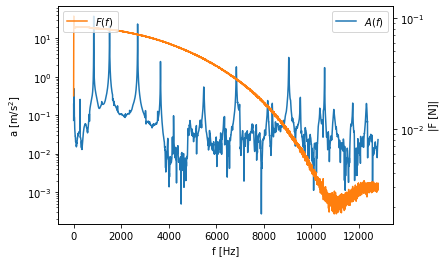

In [ ]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.semilogy(freq, np.abs(A), alpha=1, label='$A(f)$')
ax2.semilogy(freq, np.abs(F), alpha=1, c='C1', label='$F(f)$')

ax.legend(loc=1)
ax2.legend(loc=2)

ax2.set_ylabel('|F [N]|')
ax.set_ylabel('a [m/s$^2$]')
ax.set_xlabel('f [Hz]');

Ocenimo frekvenčno prenosno funkcijo:

In [ ]:
FRF = A / F

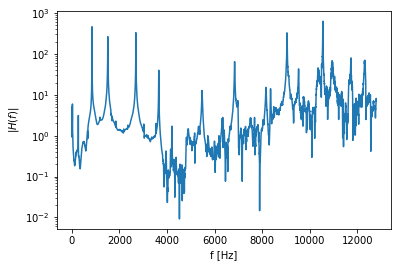

In [ ]:
plt.semilogy(freq, np.abs(FRF))
plt.ylabel('$|H(f)|$')
plt.xlabel('f [Hz]');

#### Ekponentno okno

Da zadostimo prdpostavki periodičnosti signala v primeru, ko se odziv sistema v zajetem časovnem intervalu ne izniha, uporabimo t. i. *eksponentno okno*:

$$w_e(t) = \mathrm{e}^{-t / \tau}$$

Namesto parametra časovne konstante $\tau$ pogosto želimo podati končno amplitudo $p$ (v obliki deleža začetne amplitude), ki jo okno doseže pri času $T$. Velja:

$$\tau = \frac{T}{\log(p)}$$

In [ ]:
p = 0.01 # 1 %
tau = -(len(t) - 1) / np.log(p)
w_exponential = signal.windows.exponential(len(t), center=0, tau=tau, sym=False)
w_exponential[-1]

0.010000000000000004

---


##### Primer uporabe eksponentnega okna na numeričnem modelu

In [ ]:
k2 =  (100*2*np.pi)**2
m2 = 1
c2 = 5.

sistem_primer = signal.lti([1], [m2, c2, k2])
f_primer = np.zeros_like(t)
f_primer[1000:1010] = 1.
t, x_primer, _ = sistem_primer.output(f_primer, t)

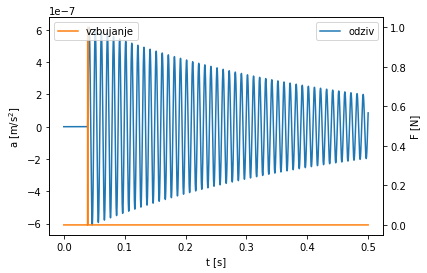

In [ ]:
fig, ax = plt.subplots()
ax.plot(t, x_primer, label='odziv')
ax2 = ax.twinx()
ax2.plot(t, f_primer, 'C1', label='vzbujanje');
ax.legend(loc=1)
ax2.legend(loc=2)

ax2.set_ylabel('F [N]')
ax.set_ylabel('a [m/s$^2$]')
ax.set_xlabel('t [s]');

In [ ]:
X_primer = np.fft.rfft(x_primer) / len(t)
X_primer[1:] *= 2

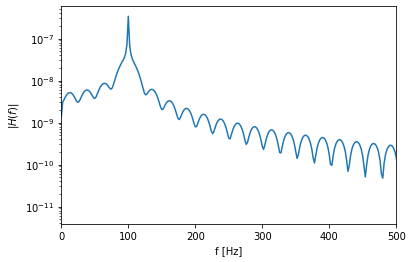

In [ ]:
plt.semilogy(freq, np.abs(X_primer))
plt.xlim(0, 500);
plt.ylabel('$|H(f)|$')
plt.xlabel('f [Hz]');

Ker v opazovanem časovnem oknu nismo zajeli popolnoma periodičnega signala, v amplitudnem spektru opazimo pojav *frekvenčnega odtekanja* (ang. [*Spectral Leakage*](https://en.wikipedia.org/wiki/Spectral_leakage)).

Odpravimo ga lahko z ustrenzno uporabo oknjenja.

In [ ]:
X_okno = np.fft.rfft(x_primer*w_exponential) / len(t)
X_okno[1:] *= 2

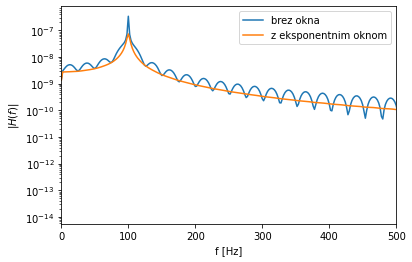

In [ ]:
plt.semilogy(freq, np.abs(X_primer), label='brez okna')
plt.semilogy(freq, np.abs(X_okno), label='z eksponentnim oknom')
plt.xlim(0, 500);
plt.legend()
plt.ylabel('$|H(f)|$')
plt.xlabel('f [Hz]');

In [ ]:
F_primer = np.fft.rfft(f_primer) / len(t)
F_primer[1:] *= 2

w, H_primer = sistem_primer.freqresp(2*np.pi*freq)
H_okno = X_okno/F_primer

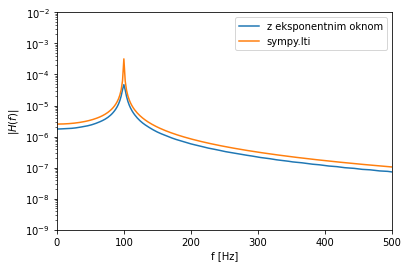

In [ ]:
plt.semilogy(freq, np.abs(H_okno), label='z eksponentnim oknom')
plt.semilogy(freq, np.abs(H_primer), label='sympy.lti')
plt.xlim(0, 500);
plt.ylim(1e-9, 1e-2)
plt.legend()
plt.ylabel('$|H(f)|$')
plt.xlabel('f [Hz]');

---

##### Uporaba eksponentnega okna na meritvi nosilca

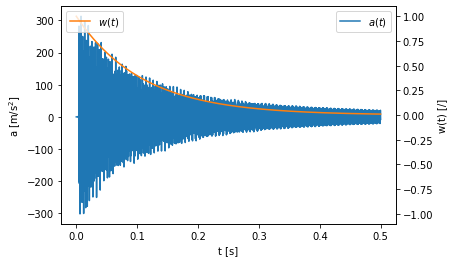

In [ ]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(t, a, alpha=1, label='$a(t)$')
ax2.plot(t, w_exponential, alpha=1, c='C1', label='$w(t)$')
ax2.set_ylim(-1.1, 1.1)

ax.legend(loc=1)
ax2.legend(loc=2)

ax2.set_ylabel('w(t) [/]')
ax.set_ylabel('a [m/s$^2$]')
ax.set_xlabel('t [s]');

In [ ]:
a_w = a * w_exponential
A_w = np.fft.rfft(a_w) / len(a_w)
A_w[1:] *= 2

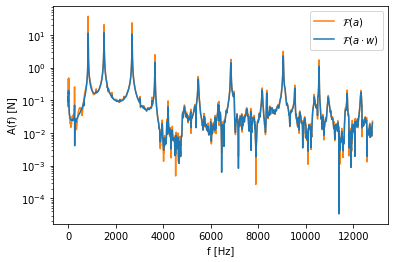

In [ ]:
fig, ax = plt.subplots()
ax.semilogy(freq, np.abs(A), alpha=1, c='C1', label='$\mathcal{F}(a)$')
ax.semilogy(freq, np.abs(A_w), alpha=1, label='$\mathcal{F}(a \cdot w)$')

ax.legend(loc=1)

ax.set_ylabel('A(f) [N]')
ax.set_xlabel('f [Hz]');

#### Force okno

Da zmanjšamo vpliv šuma na vhodnem signalu $f(t)$ uporabimo t. i. *"force" okno*, s katerim izničimo vrednosti signala sile po koncu udarca.

Parameter "force" okna je dolžina segmenta okna (v obliki deleža skupne dolžine signala) z enotsko amplitudo, ki jo bomo označili z $l_w$.

Pri pripravi "force" okna si lahko pomagamo z oknom cosinusnega upada `scipy.signal.windows.tukey`.


In [ ]:
l_w = 0.1
N_w = int(l_w * len(t))
w_force = np.zeros_like(t)
w_force[:N_w] = signal.windows.tukey(len(t)*2, alpha=0.05)[-N_w:]

Ker smo na signalu odziva uporabili eksponentno okno, moramo *eksponentno okno uporabiti tudi na signalu sile*.

In [ ]:
w_f = w_force * w_exponential

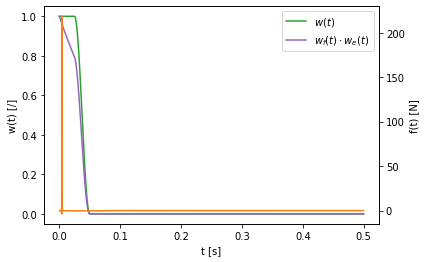

In [ ]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(t, w_force, alpha=1, c='C2', label='$w(t)$')
ax.plot(t, w_f, alpha=1, c='C4', label='$w_f(t) \cdot w_e(t)$')
ax2.plot(t, f, alpha=1, c='C1', label='$f(t)$')

ax.legend(loc=0)

ax.set_ylabel('w(t) [/]')
ax2.set_ylabel('f(t) [N]')
ax.set_xlabel('t [s]');

Uporaba force okna:

In [ ]:
f_w = f * w_f
F_w = np.fft.rfft(f_w) / len(f_w)
F_w[1:] *= 2

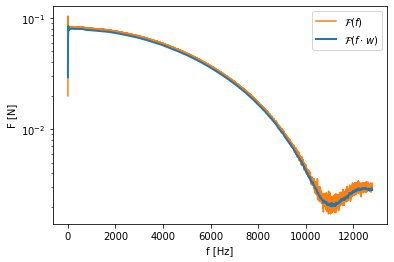

In [ ]:
fig, ax = plt.subplots()
ax.semilogy(freq, np.abs(F), alpha=1, c='C1', label='$\mathcal{F}(f)$')
ax.semilogy(freq, np.abs(F_w), alpha=1, lw=2, label='$\mathcal{F}(f \cdot w)$')

ax.legend(loc=1)

ax.set_ylabel('F [N]')
ax.set_xlabel('f [Hz]');

#### FRF z okni

In [ ]:
FRF_w = A_w / F_w

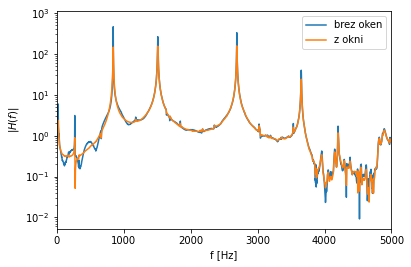

In [ ]:
plt.semilogy(freq, np.abs(FRF), label='brez oken')
plt.semilogy(freq, np.abs(FRF_w), label='z okni')
plt.ylabel('$|H(f)|$')
plt.xlabel('f [Hz]')
plt.legend()
plt.xlim(0, 5000);

## Domača naloga

:::{admonition} Domača naloga
:class: warning

N podlagi meritev nosilca, ki ste jih v skupini zajeli na prejšnji vaji, izračunajte in prikažite frekvenčne prenosne funkcije pospešenosti za vse pomerjene lokacije vzbujanja na nosilcu. Pri obdelavi zajetih signalov ustrezno uporabite eksponentno okno ter "force" okno s parametri iz podatkov naloge.

V okolju Jupyter Notebook pripravite kratko poročilo *(od 3 do 10 celic s kodo)* z rezultati in kratkimi komentarji, v katerem naj bodo razvidni tudi podatki naloge.

Poročilo oddajte tudi v `.pdf` obliki (glejte [navodila za oddajo domačih nalog](intro-domace-naloge)).

**Dodatek**: 
Na podlagi pripravljenih FPF pri različnih točkah nosilca ocenite prvo lastno obliko obravnavanega nosilca.

*Lastna oblika* podaja razmerje amplitud odziva sistema na vzbujanje v različnih točkah $i$:

$$\{A\}^r = \{A_0^r, A_1^r, \dots A_i^r \dots A_n^r\}$$

kjer so $A^r_i$ t. i. modalne konstante sistema pri lastni frekvenci $\omega_r$. 

Modalne konstante lahko ocenite *s poljubno metodo* (glejte spodnji zaznamek). 

Za identifikacijo modalnih konstant lahko uporabite tudi paket [pyEMA](https://pypi.org/project/pyEMA/). Pomagate si lahko s [temle primerom uporabe](https://github.com/ladisk/pyEMA/blob/master/pyEMA%20Showcase.ipynb).

:::

:::{admonition} Metoda največjih amplitud
:class: info

Ena najpreprostejših metod modalne identifikacije je [metoda največjih amplitud](https://link.springer.com/article/10.1007/s42452-019-0806-8#Sec2) (*Peak amplitue*, tudi *Peak Picking method*):

$\omega_r = \text{arg max}(|\alpha(\omega)|)$ (krožna frekvenca resonančnega vrha)

$\eta_r = \frac{\omega_a - \omega_b}{\omega_r}$ (razmernik dušenja), kjer sta $\omega_a$ in $\omega_b$ t. i. točki polovične moči v okolici $\omega_r$:

$|\alpha(\omega_{a, b})| = \frac{|\alpha(\omega_r)|} {\sqrt{2}}$

Iz FPF za posamezno obravnavano točko $i$ pa lahko določite modalne konstante:

$A^r_i = |\alpha_i(\omega_r)| \, \omega_r^2 \, \eta_r$

:::